## MAMM - 2012 to 2014 - Analysing multiple flights covering several years

For the MAMM campaign (Methane in the Arctic: Measurements and Modelling) the FAAM aircraft went to Kiruna, Sweden several times to measure methane concentrations over the wetlands in Sweden and Finland.

In [2]:
%matplotlib inline

import cis
import datetime
import os

ROOT_DATA_PATH = '/Users/watson-parris/Desktop/cis_workshop/data/mamm'

os.chdir(ROOT_DATA_PATH)

### Reading in modified FAAM core data

Reading in **all** data files. Those files have been created previously by merging the FAAM core netCDF with the FGGA (Fast Greenhouse Gashouse Analyser) instrument nasa-AMES data. By default the core dataset does not contain either the CO2 or CH4 data.

In [3]:
methane = cis.read_data(ROOT_DATA_PATH+'/*/core_faam*.nc', 'CH4')

Plot time series of methane.

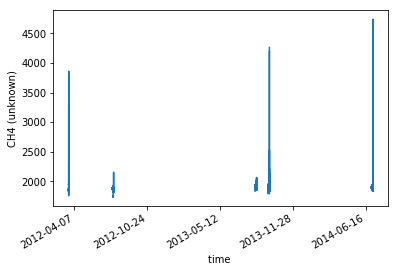

In [4]:
methane.plot(xaxis='time')

### Analysis

Subsetting for the three years 2012, 2013, and 2014.

In [5]:
from cis.time_util import PartialDateTime
data = {}
data['2012'] = methane.subset(t=PartialDateTime(2012))
data['2013'] = methane.subset(t=PartialDateTime(2013))
data['2014'] = methane.subset(t=PartialDateTime(2014))

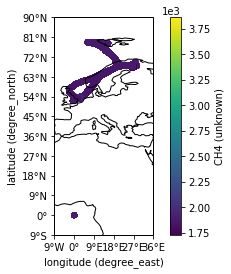

In [6]:
data['2012'].plot()

Aggregate all data for each year, where every cell is 0.5x0.5 degrees and look only data points for the lowest 1000m.

In [7]:
for year in ['2012', '2013', '2014']:
    data[year+'_agg'] = data[year].aggregate(x=[10, 40, 0.5],
                                             y=[65, 85, 0.5],
                                             z=[0, 1000, 1000],
                                             how='mean')

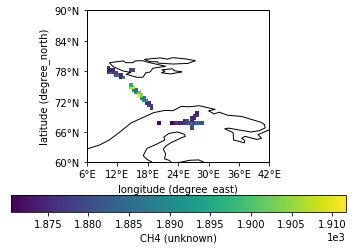

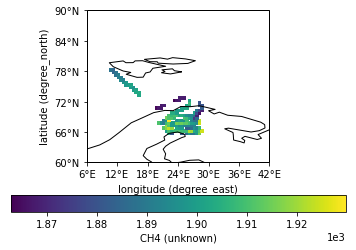

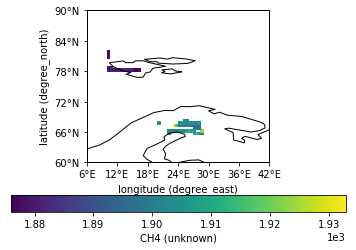

In [8]:
data['2012_agg'].plot()
data['2013_agg'].plot()
data['2014_agg'].plot()